In [1]:
%%info


In [2]:
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1703392468137_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
df = spark.read.csv('s3://cis9760-athena-queries-rn/Unsaved/2023/12/23/0a177fb6-a3dc-4249-b6f4-ec12de7aa045.csv', header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- COMP: string (nullable = true)
 |-- DATE: string (nullable = true)
 |-- AVG_VOL: string (nullable = true)
 |-- MAX_VOL: string (nullable = true)
 |-- MIN_VOL: string (nullable = true)

In [5]:
from pyspark.sql.functions import col

df = df.withColumn("AVG_VOL", col("AVG_VOL").cast("double"))
df = df.withColumn("MAX_VOL", col("MAX_VOL").cast("double"))
df = df.withColumn("MIN_VOL", col("MIN_VOL").cast("double"))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
sc.install_pypi_package("pandas==1.0.5")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

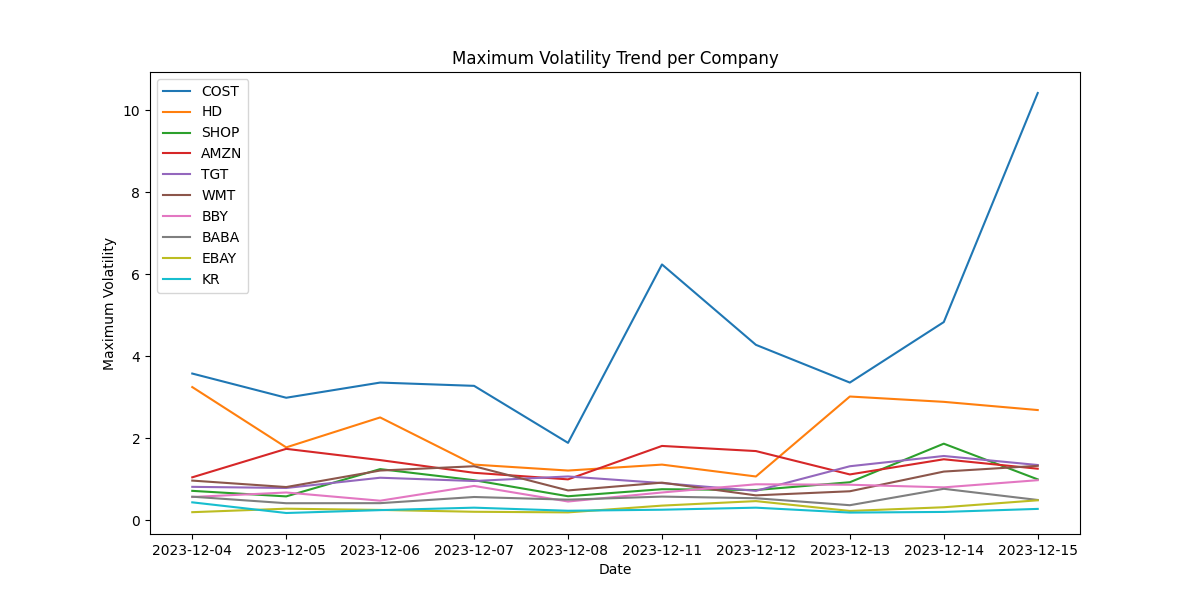

In [20]:
#graph 2
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, avg, desc


max_volatility_per_company = df.groupBy("COMP").agg({"MAX_VOL": "max"})

max_volatility_ordered = max_volatility_per_company.orderBy(desc('max(MAX_VOL)'))

result_pd_df = max_volatility_ordered.toPandas()

plt.figure(figsize=(12, 6))
for company in result_pd_df['COMP']:
    company_data = df.filter(col("COMP") == company).orderBy("DATE").toPandas()
    plt.plot(company_data['DATE'], company_data['MAX_VOL'], label=company)

plt.xlabel("Date")
plt.ylabel("Maximum Volatility")
plt.title("Maximum Volatility Trend per Company")
plt.legend()
plt.show()
%matplot plt


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

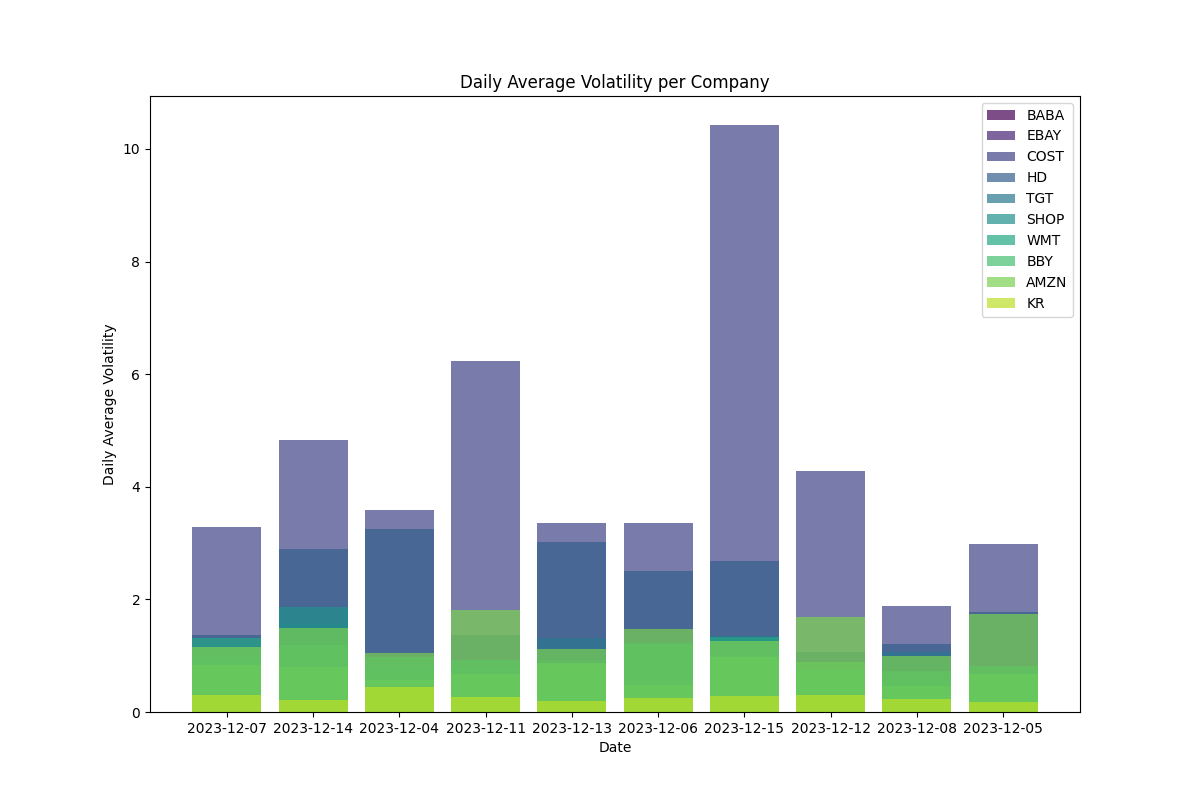

In [19]:
# graph 2
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("VolatilityAnalysis").getOrCreate()

daily_avg_volatility = df.groupBy("COMP", "DATE").agg(avg("MAX_VOL").alias("DAILY_AVG_VOL"))

result_pd_df = daily_avg_volatility.toPandas()

plt.figure(figsize=(12, 8))
companies = result_pd_df['COMP'].unique()

for i, company in enumerate(companies):
    company_data = result_pd_df[result_pd_df['COMP'] == company]
    plt.bar(
        company_data['DATE'],
        company_data['DAILY_AVG_VOL'],
        label=company,
        alpha=0.7,
        color=plt.cm.viridis(i / len(companies))
    )

plt.xlabel("Date")
plt.ylabel("Daily Average Volatility")
plt.title("Daily Average Volatility per Company")
plt.legend()
plt.show()
%matplot plt